# Steps for implementation
#### Reading CSV
#### Data Description
#### Data Cleaning
#### Data Normalization
#### Features Selection Techniques

In [127]:
#Importing Necessary Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split     # import module for train test split
from pyod.models.knn import KNN
from pyod.models.cblof import CBLOF
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy import stats
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA

### Reading CSV

In [52]:
df1=pd.read_csv("../../Datasets/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("../../Datasets/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("../../Datasets/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("../../Datasets/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("../../Datasets/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
#df6=pd.read_csv("../Datasets/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
#df7=pd.read_csv("../Datasets/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
#df8=pd.read_csv("../Datasets/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")


In [53]:

df=pd.concat([df1,df2,df3,df4,df5])
#df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [54]:
del df1,df2, df3, df4, df5
#del df1,df2,df3,df4,df5,df6,df7,df8


In [55]:
# category A attacks
df_bot=df[df[' Label']=='Bot']
df_ddos=df[df[' Label']=='DDoS']
df_golden_eye=df[df[' Label']=='DoS GoldenEye']
df_hulk=df[df[' Label']=='DoS Hulk']
df_ssh_patator=df[df[' Label']=='SSH-Patator']
df_ftp_patator=df[df[' Label']=='FTP-Patator']
df_infiltration=df[df[' Label']=='Infiltration']

In [56]:
# benign data
df_benign=df[df[' Label']=='BENIGN']
df_benign.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [57]:
df_anomalies = df[df [' Label'] != 'BENIGN']
df_anomalies.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
18883,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
18884,80,4421382,4,0,24,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
18885,80,1083538,3,6,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
18886,80,80034360,8,4,56,11601,20,0,7.000000,5.656854,...,20,939.0,0.0,939,939,39300000.0,44200000.0,70600000,8072664,DDoS
18887,80,642654,3,6,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS


In [58]:
del df_bot,df_ddos,df_golden_eye,df_hulk,df_ssh_patator,df_ftp_patator,df_infiltration

### Data Description

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521765 entries, 0 to 288601
Data columns (total 79 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0    Destination Port             1521765 non-null  int64  
 1    Flow Duration                1521765 non-null  int64  
 2    Total Fwd Packets            1521765 non-null  int64  
 3    Total Backward Packets       1521765 non-null  int64  
 4   Total Length of Fwd Packets   1521765 non-null  int64  
 5    Total Length of Bwd Packets  1521765 non-null  int64  
 6    Fwd Packet Length Max        1521765 non-null  int64  
 7    Fwd Packet Length Min        1521765 non-null  int64  
 8    Fwd Packet Length Mean       1521765 non-null  float64
 9    Fwd Packet Length Std        1521765 non-null  float64
 10  Bwd Packet Length Max         1521765 non-null  int64  
 11   Bwd Packet Length Min        1521765 non-null  int64  
 12   Bwd Packet Length Mean      

In [60]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,...,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06,1.521765e+06
mean,8.940038e+03,1.020365e+07,7.912345e+00,8.592020e+00,5.514007e+02,1.235853e+04,2.102629e+02,1.940110e+01,6.108118e+01,7.054161e+01,...,5.345445e+00,-1.241946e+03,8.009669e+04,3.592467e+04,1.443197e+05,5.993348e+04,4.025782e+06,6.627598e+05,4.501709e+06,3.521134e+06
std,1.888909e+04,2.825325e+07,6.555739e+02,8.699875e+02,1.234449e+04,1.969618e+06,8.371356e+02,7.049883e+01,2.197547e+02,3.390967e+02,...,6.249296e+02,3.261167e+05,6.350860e+05,3.635819e+05,9.888859e+05,5.692689e+05,1.403368e+07,5.354963e+06,1.569026e+07,1.329576e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-8.388531e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,8.500000e+01,1.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.100000e+01,3.059000e+04,2.000000e+00,2.000000e+00,5.100000e+01,1.020000e+02,3.200000e+01,6.000000e+00,2.900000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.043000e+03,8.287190e+05,4.000000e+00,3.000000e+00,9.600000e+01,3.340000e+02,5.100000e+01,3.500000e+01,4.700000e+01,1.026320e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.260000e+02,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.660000e+07,1.200000e+08,1.200000e+08


In [61]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

### Data Cleaning

In [62]:
len(df.columns)

79

In [63]:
len(df)

1521765

In [64]:
df=df.dropna( axis=0, how='any')
df=df.replace(',,', np.nan, inplace=False)
len(df)

1521636

In [65]:
len(df[' Fwd Header Length.1'].unique())

2678

In [66]:
df.replace("Infinity", 0, inplace=True)
df['Flow Bytes/s'].replace("Infinity", 0,inplace=True)
df[" Flow Packets/s"].replace("Infinity", 0, inplace=True)
df[" Flow Packets/s"].replace(np.nan, 0, inplace=True)
df['Flow Bytes/s'].replace(np.nan, 0,inplace=True)


df["Bwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
df["Bwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
df["Bwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)

df[" Bwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
df[" Bwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
df[" Bwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)


df[" Bwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
df[" Bwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
df[" Bwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)


df[" Fwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
df[" Fwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
df[" Fwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)


df[" Fwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
df[" Fwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
df[" Fwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)


df["Fwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
df["Fwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
df["Fwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)


df[" CWE Flag Count"].replace("Infinity", 0, inplace=True)
df[" CWE Flag Count"].replace(",,", 0, inplace=True)
df[" CWE Flag Count"].replace(np.nan, 0, inplace=True)

df[" Bwd URG Flags"].replace("Infinity", 0, inplace=True)
df[" Bwd URG Flags"].replace(",,", 0, inplace=True)
df[" Bwd URG Flags"].replace(np.nan, 0, inplace=True)

df[" Bwd PSH Flags"].replace("Infinity", 0, inplace=True)
df[" Bwd PSH Flags"].replace(",,", 0, inplace=True)
df[" Bwd PSH Flags"].replace(np.nan, 0, inplace=True)

df[" Fwd URG Flags"].replace("Infinity", 0, inplace=True)
df[" Fwd URG Flags"].replace(",,", 0, inplace=True)
df[" Fwd URG Flags"].replace(np.nan, 0, inplace=True)

In [67]:
df["Flow Bytes/s"]=df["Flow Bytes/s"].astype("float64")
df[' Flow Packets/s']=df[" Flow Packets/s"].astype("float64")

In [68]:
df['Bwd Avg Bulk Rate']=df["Bwd Avg Bulk Rate"].astype("float64")
df[' Bwd Avg Packets/Bulk']=df[" Bwd Avg Packets/Bulk"].astype("float64")
df[' Bwd Avg Bytes/Bulk']=df[" Bwd Avg Bytes/Bulk"].astype("float64")
df[' Fwd Avg Bulk Rate']=df[" Fwd Avg Bulk Rate"].astype("float64")
df[' Fwd Avg Packets/Bulk']=df[" Fwd Avg Packets/Bulk"].astype("float64")
df['Fwd Avg Bytes/Bulk']=df["Fwd Avg Bytes/Bulk"].astype("float64")
df[' CWE Flag Count']=df[" CWE Flag Count"].astype("float64")
df[' Bwd URG Flags']=df[" Bwd URG Flags"].astype("float64")
df[' Bwd PSH Flags']=df[" Bwd PSH Flags"].astype("float64")
df[' Fwd URG Flags']=df[" Fwd URG Flags"].astype("float64")

In [69]:
pd.set_option('display.max_rows', df.shape[0])

In [70]:
df.replace('Infinity',0.0, inplace=True)

In [71]:
df.replace('NaN',0.0, inplace=True)

In [72]:
df.drop([' Destination Port'], axis=1, inplace=True) 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521636 entries, 0 to 288601
Data columns (total 78 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0    Flow Duration                1521636 non-null  int64  
 1    Total Fwd Packets            1521636 non-null  int64  
 2    Total Backward Packets       1521636 non-null  int64  
 3   Total Length of Fwd Packets   1521636 non-null  int64  
 4    Total Length of Bwd Packets  1521636 non-null  int64  
 5    Fwd Packet Length Max        1521636 non-null  int64  
 6    Fwd Packet Length Min        1521636 non-null  int64  
 7    Fwd Packet Length Mean       1521636 non-null  float64
 8    Fwd Packet Length Std        1521636 non-null  float64
 9   Bwd Packet Length Max         1521636 non-null  int64  
 10   Bwd Packet Length Min        1521636 non-null  int64  
 11   Bwd Packet Length Mean       1521636 non-null  float64
 12   Bwd Packet Length Std       

In [74]:
df=df.round(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521636 entries, 0 to 288601
Data columns (total 78 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0    Flow Duration                1521636 non-null  int64  
 1    Total Fwd Packets            1521636 non-null  int64  
 2    Total Backward Packets       1521636 non-null  int64  
 3   Total Length of Fwd Packets   1521636 non-null  int64  
 4    Total Length of Bwd Packets  1521636 non-null  int64  
 5    Fwd Packet Length Max        1521636 non-null  int64  
 6    Fwd Packet Length Min        1521636 non-null  int64  
 7    Fwd Packet Length Mean       1521636 non-null  float64
 8    Fwd Packet Length Std        1521636 non-null  float64
 9   Bwd Packet Length Max         1521636 non-null  int64  
 10   Bwd Packet Length Min        1521636 non-null  int64  
 11   Bwd Packet Length Mean       1521636 non-null  float64
 12   Bwd Packet Length Std       

In [75]:


X=df[df.columns[0:-1]]
y=df[df.columns[-1]]


In [76]:
#del df
X[X<0] = 0

/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-packages/pandas/core/frame.py:2986: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [77]:
X.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,...,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06
mean,1.020451e+07,7.912891e+00,8.592703e+00,5.514474e+02,1.235958e+04,2.102807e+02,1.940274e+01,6.108644e+01,7.054742e+01,6.937872e+02,...,5.345898e+00,2.589896e+01,8.010348e+04,3.592772e+04,1.443319e+05,5.993856e+04,4.026123e+06,6.628160e+05,4.502091e+06,3.521433e+06
std,2.825430e+07,6.556017e+02,8.700244e+02,1.234501e+04,1.969701e+06,8.371689e+02,7.050159e+01,2.197632e+02,3.391104e+02,1.799086e+03,...,6.249561e+02,6.758645e+00,6.351125e+05,3.635971e+05,9.889270e+05,5.692928e+05,1.403423e+07,5.355187e+06,1.569088e+07,1.329629e+07
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.500000e+01,1.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.059100e+04,2.000000e+00,2.000000e+00,5.100000e+01,1.020000e+02,3.200000e+01,6.000000e+00,2.900000e+01,0.000000e+00,6.100000e+01,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.292345e+05,4.000000e+00,3.000000e+00,9.600000e+01,3.340000e+02,5.100000e+01,3.500000e+01,4.700000e+01,1.026000e+01,1.810000e+02,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940860e+03,7.125600e+03,1.314000e+04,...,2.135570e+05,1.260000e+02,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.660000e+07,1.200000e+08,1.200000e+08


In [78]:
cols = list(X.columns)
for col in cols:
    X[col] = (X[col] - X[col].min())/ X[col].max()

/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Data Normalization

In [79]:
X.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,...,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06,1.521636e+06
mean,8.503761e-02,3.145669e-05,2.943493e-05,4.274786e-05,1.885655e-05,8.472228e-03,8.345265e-03,1.028242e-02,9.900559e-03,5.279963e-02,...,2.503265e-05,2.055473e-01,7.282134e-04,5.096130e-04,1.312108e-03,5.448960e-04,3.355103e-02,8.652950e-03,3.751742e-02,2.934527e-02
std,2.354525e-01,2.983276e-03,2.980332e-03,9.569777e-04,3.005099e-03,3.372961e-02,3.032327e-02,3.699182e-02,4.759044e-02,1.369167e-01,...,2.926414e-03,5.364004e-02,5.773750e-03,5.157406e-03,8.990245e-03,5.175389e-03,1.169519e-01,6.991106e-02,1.307573e-01,1.108024e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.083334e-07,0.000000e+00,3.425573e-06,4.651163e-07,9.153974e-09,2.417405e-04,0.000000e+00,1.009955e-03,0.000000e+00,4.566210e-04,...,0.000000e+00,1.587302e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.549250e-04,4.550439e-06,6.851145e-06,3.953488e-06,1.556176e-07,1.289283e-03,2.580645e-03,4.881448e-03,0.000000e+00,4.642314e-03,...,4.682591e-06,1.904762e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.910288e-03,1.365132e-05,1.027672e-05,7.441860e-06,5.095712e-07,2.054795e-03,1.505376e-02,7.911313e-03,1.439879e-03,1.377473e-02,...,9.365181e-06,2.539683e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,9.999954e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [80]:
X=X.round(2)
X.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
X.replace("Infinity", 0, inplace=True)
X.replace(",,", 0, inplace=True)
X.replace(np.nan, 0, inplace=True)


### Features Selection Techniques

## Chi square Method

In [82]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)

In [83]:
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Column Name','Score']  
print(featureScores.nlargest(30,'Score'))  

                 Column Name          Score
9      Bwd Packet Length Max  236326.370083
12     Bwd Packet Length Std  210607.099402
40         Packet Length Std  205299.924894
45            PSH Flag Count  202015.168510
41    Packet Length Variance  192663.252690
11    Bwd Packet Length Mean  148625.581820
53      Avg Bwd Segment Size  148625.581820
39        Packet Length Mean  135328.104850
38         Max Packet Length  106869.296243
51       Average Packet Size   98662.726840
46            ACK Flag Count   77112.413194
74                  Idle Std   40626.018346
47            URG Flag Count   36366.879988
75                  Idle Max   33652.977145
17              Flow IAT Max   32376.000953
22               Fwd IAT Max   32335.554542
21               Fwd IAT Std   24531.522521
65    Init_Win_bytes_forward   23494.890919
73                 Idle Mean   22417.375846
24             Bwd IAT Total   22385.358308
0              Flow Duration   18728.861812
19             Fwd IAT Total   1

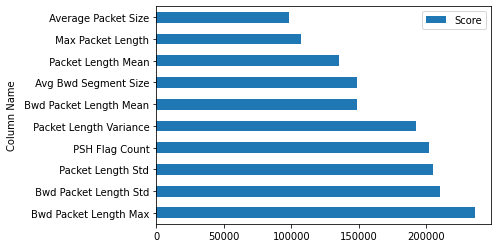

In [84]:
featureScores.nlargest(10,'Score').plot(x='Column Name', y='Score', kind='barh')
plt.show()

### Tree based classifier to get feature importance 

In [85]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[1.90832658e-02 8.06149620e-06 7.18531097e-06 2.81549733e-05
 1.06691431e-05 7.26211436e-03 4.16758478e-03 1.53502669e-02
 1.13317716e-02 3.95353499e-02 4.12436072e-03 3.66448701e-02
 3.44450304e-02 0.00000000e+00 0.00000000e+00 5.47936422e-03
 2.25487906e-02 1.56566232e-02 8.66076551e-04 1.74606914e-02
 5.94564146e-03 2.42133308e-02 2.23899705e-02 2.03552426e-03
 1.15991573e-02 4.02776770e-03 4.30204702e-03 6.03632316e-03
 1.12152708e-03 5.28750451e-03 0.00000000e+00 3.74532605e-05
 0.00000000e+00 1.48470464e-05 1.22599558e-05 1.31380588e-02
 2.38681681e-02 7.32832796e-03 1.86850921e-02 4.53433002e-02
 4.41524146e-02 2.86995151e-02 2.08646008e-03 4.91365307e-03
 4.75868727e-06 1.42471170e-01 2.90564056e-02 1.39335404e-02
 2.94683515e-05 1.47887464e-06 6.18614286e-02 3.61479321e-02
 1.26975081e-02 4.01823750e-02 1.81217152e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.97253090e-06 2.82404301e-05 1.28891900e-05
 5.92125795e-06 4.781866

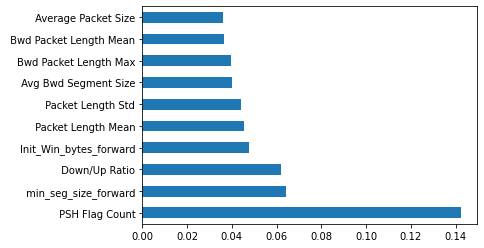

In [86]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Corelation 

In [87]:
selectKFeatures= 20

In [88]:
top_features= featureScores.nlargest(selectKFeatures,'Score')['Column Name']
#get correlations of each features in dataset
corrmat = df[top_features].corr()
top_corr_features = corrmat.index
print(top_corr_features)

Index(['Bwd Packet Length Max', ' Bwd Packet Length Std', ' Packet Length Std',
       ' PSH Flag Count', ' Packet Length Variance', ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size', ' Packet Length Mean', ' Max Packet Length',
       ' Average Packet Size', ' ACK Flag Count', ' Idle Std',
       ' URG Flag Count', ' Idle Max', ' Flow IAT Max', ' Fwd IAT Max',
       ' Fwd IAT Std', 'Init_Win_bytes_forward', 'Idle Mean', 'Bwd IAT Total'],
      dtype='object')


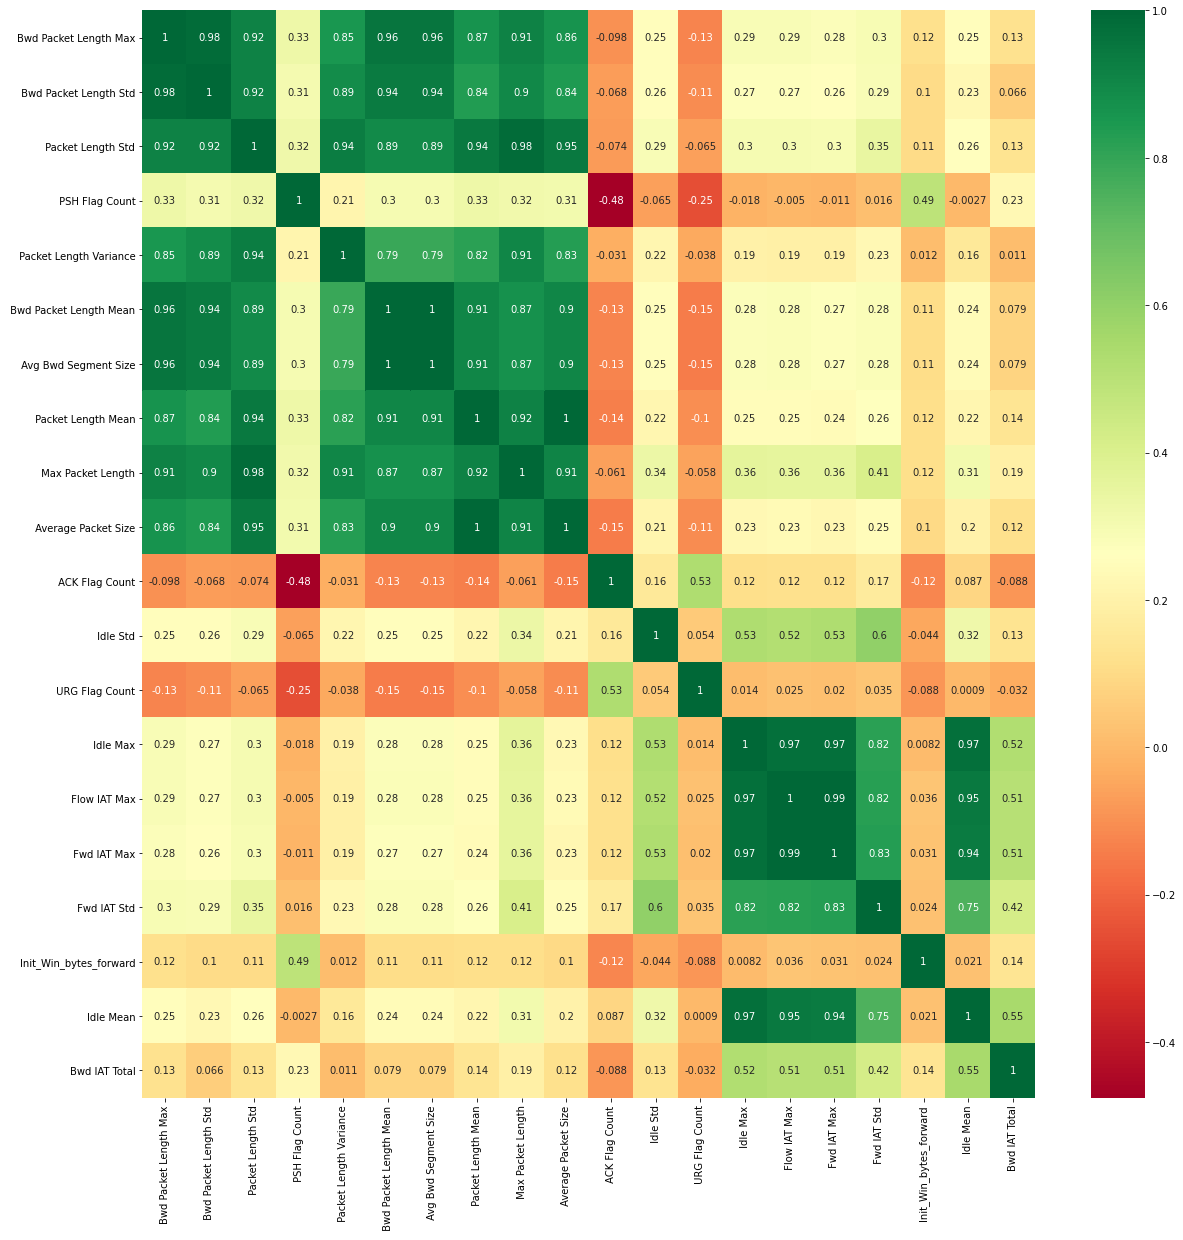

In [89]:
plt.figure(figsize=(selectKFeatures,selectKFeatures))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Low variance filter

In [90]:
varinaces = X.var()

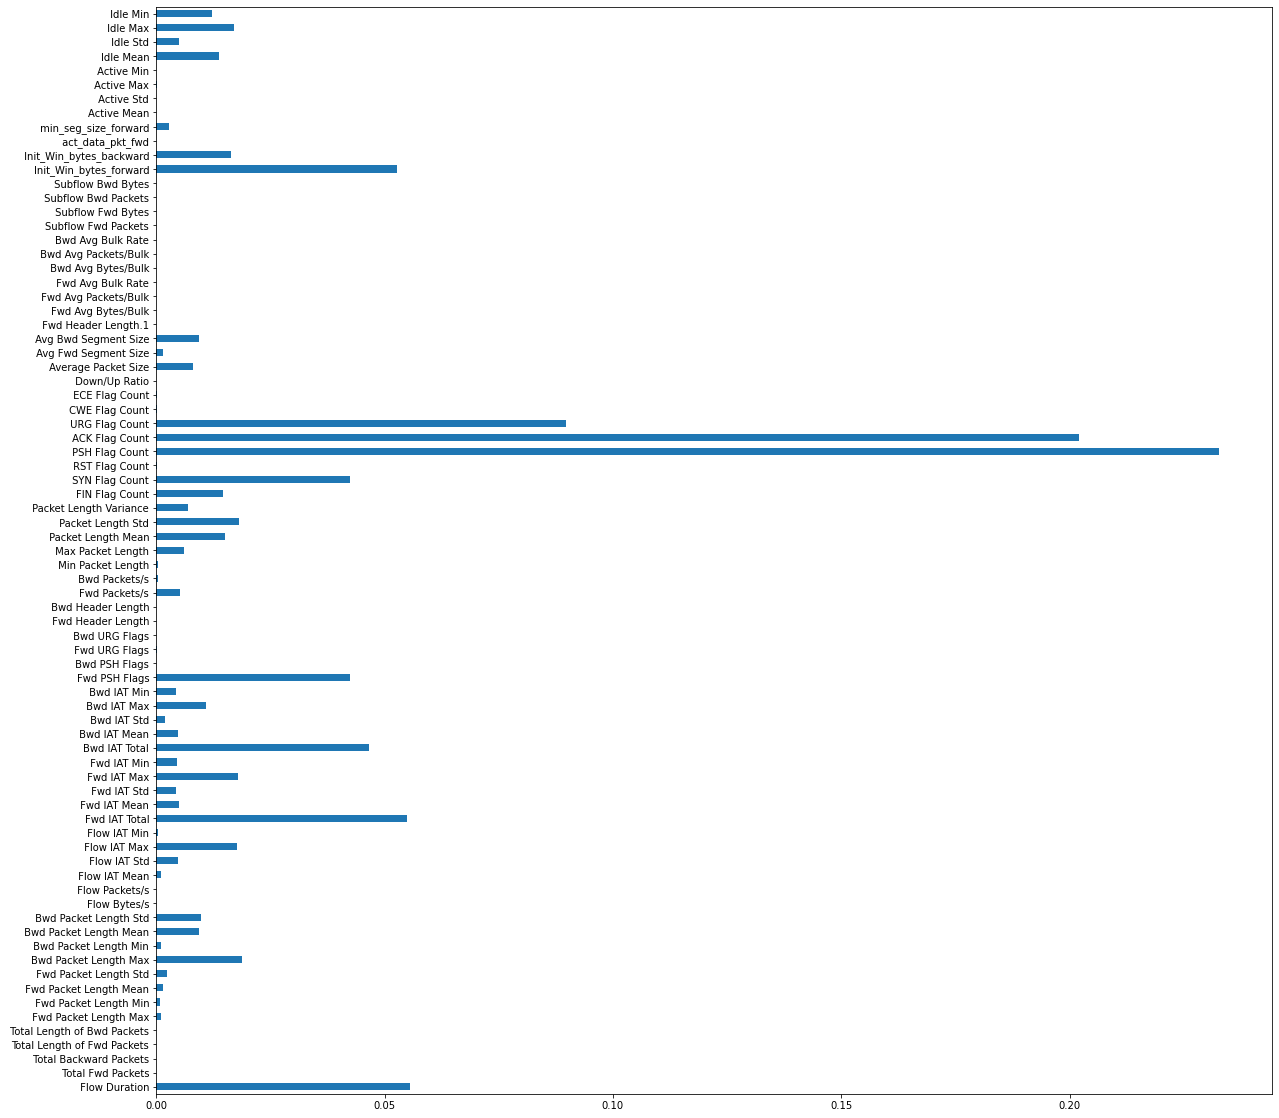

In [91]:
varinaces.plot(kind='barh', figsize =(20,20))


In [109]:
lowVarianceThreshold = 0.01

In [111]:
selectedColumn = varinaces[ varinaces > lowVarianceThreshold ]

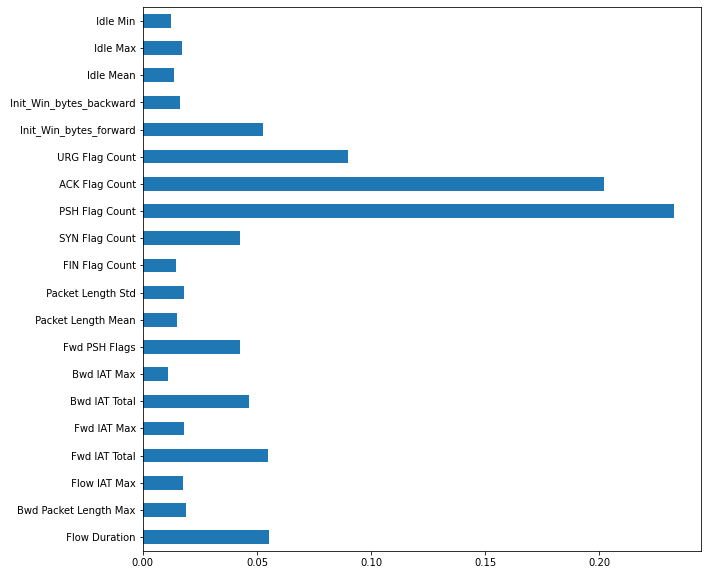

In [114]:
selectedColumn.plot(kind='barh', figsize =(10,10))

### High Correlation filter

In [121]:
model = RandomForestClassifier(random_state=1, max_depth=10)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

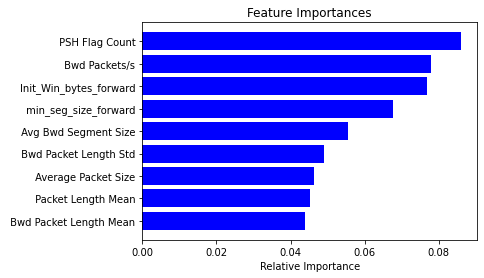

In [122]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Factor Analysis

In [133]:
FA = FactorAnalysis(n_components = 3).fit_transform(X)

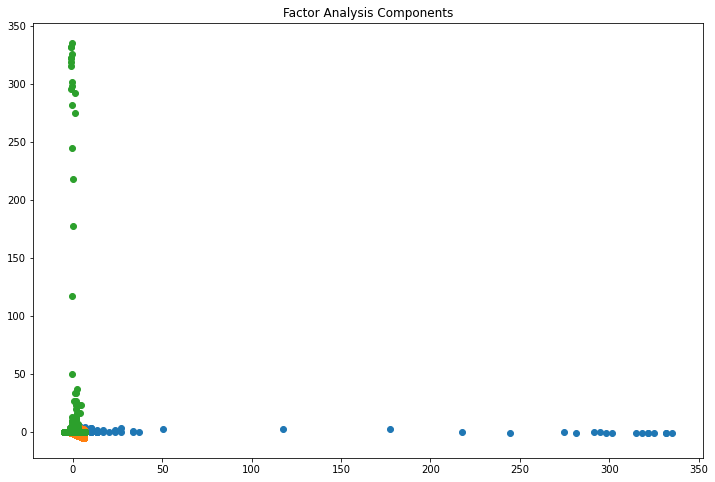

In [134]:
#ploting first 3
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

### PCA

In [130]:
pca = PCA(n_components=20)
pca_result = pca.fit_transform(X)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

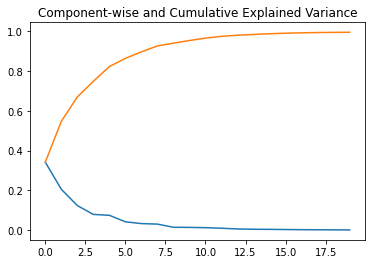

In [132]:
plt.plot(range(20), pca.explained_variance_ratio_)
plt.plot(range(20), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")